In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot

In [3]:
import warnings
warnings.filterwarnings('ignore')

### 1. Read the Data

In [4]:
tcs=pd.read_csv('TCS.csv',header=0,parse_dates=True)

In [5]:
tcs.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-01,59.987499,61.974998,59.987499,61.087502,43.082623,6027072.0
1,2003-01-02,61.525002,62.924999,57.912498,58.299999,41.116711,5325328.0
2,2003-01-03,60.000000,61.049999,58.500000,59.012501,41.619205,4198040.0
3,2003-01-06,59.924999,60.187500,56.875000,57.262501,40.384998,4121520.0
4,2003-01-07,58.000000,58.500000,56.062500,56.599998,39.917763,2650800.0


In [6]:
tcs.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5255,2024-02-23,4130.000000,4130.000000,4046.399902,4052.100098,4052.100098,2538072.0
5256,2024-02-26,4036.000000,4050.000000,3982.750000,4001.050049,4001.050049,1379284.0
5257,2024-02-27,3999.000000,4124.000000,3999.000000,4104.399902,4104.399902,2960475.0
5258,2024-02-28,4095.600098,4154.899902,4089.000000,4118.950195,4118.950195,1939225.0
5259,2024-02-29,4099.000000,4138.100098,4064.550049,4095.100098,4095.100098,3772719.0


### 2. EDA

In [7]:
tcs.shape

(5260, 7)

In [8]:
tcs.isnull().sum()

Date         0
Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
dtype: int64

In [9]:
tcs= tcs.fillna(method='ffill')

In [10]:
tcs.duplicated().value_counts()

False    5260
Name: count, dtype: int64

In [11]:
tcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5260 entries, 0 to 5259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5260 non-null   object 
 1   Open       5260 non-null   float64
 2   High       5260 non-null   float64
 3   Low        5260 non-null   float64
 4   Close      5260 non-null   float64
 5   Adj Close  5260 non-null   float64
 6   Volume     5260 non-null   float64
dtypes: float64(6), object(1)
memory usage: 287.8+ KB


In [12]:
tcs['Date'] = pd.to_datetime(tcs['Date'])

In [13]:
print(tcs['Date'].dtype)

datetime64[ns]


In [14]:
tcs.set_index('Date',inplace=True)

In [15]:
tcs.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5260.000000,5260.000000,5260.000000,5260.000000,5260.000000,5.260000e+03
mean,1201.412875,1213.754783,1188.220139,1200.914533,1081.797621,3.239183e+06
std,1130.464665,1140.164278,1120.097582,1130.161034,1104.100092,3.148949e+06
min,32.474998,38.387501,32.474998,38.387501,27.073210,0.000000e+00
25%,248.737499,252.149998,244.971874,248.393745,179.880535,1.671825e+06
50%,781.875000,788.000000,776.237488,783.574982,624.429290,2.533470e+06
75%,1914.187500,1938.925018,1891.324982,1913.012451,1718.006287,3.981785e+06
max,4153.000000,4184.750000,4105.549805,4149.500000,4149.500000,8.806715e+07


In [16]:
tcs.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999911,0.999916,0.999821,0.998318,-0.156306
High,0.999911,1.000000,0.999902,0.999932,0.998389,-0.154228
Low,0.999916,0.999902,1.000000,0.999922,0.998478,-0.157828
Close,0.999821,0.999932,0.999922,1.000000,0.998506,-0.156019
Adj Close,0.998318,0.998389,0.998478,0.998506,1.000000,-0.153040
Volume,-0.156306,-0.154228,-0.157828,-0.156019,-0.153040,1.000000


In [17]:
tcs.sample(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-19,1929.000000,1929.000000,1870.050049,1913.199951,1705.033569,3428776.0
2012-08-30,669.950012,694.400024,661.700012,683.575012,542.126282,3333432.0
2013-02-26,733.500000,749.974976,733.000000,748.200012,596.096436,2853670.0
2004-08-05,99.750000,100.699997,98.250000,98.849998,69.715034,44048.0
2023-12-15,3666.699951,3895.949951,3666.699951,3861.000000,3843.191895,8531230.0


### 3. Data Visualization

In [18]:
df=tcs.copy()

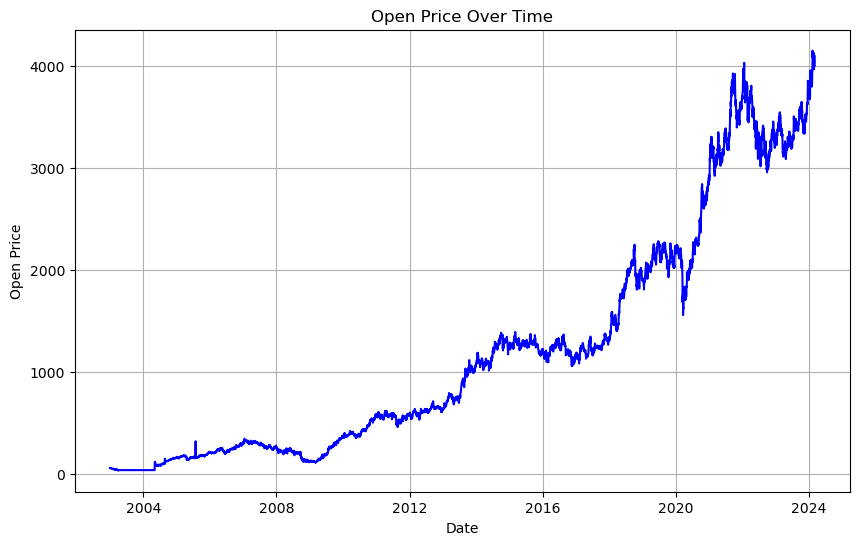

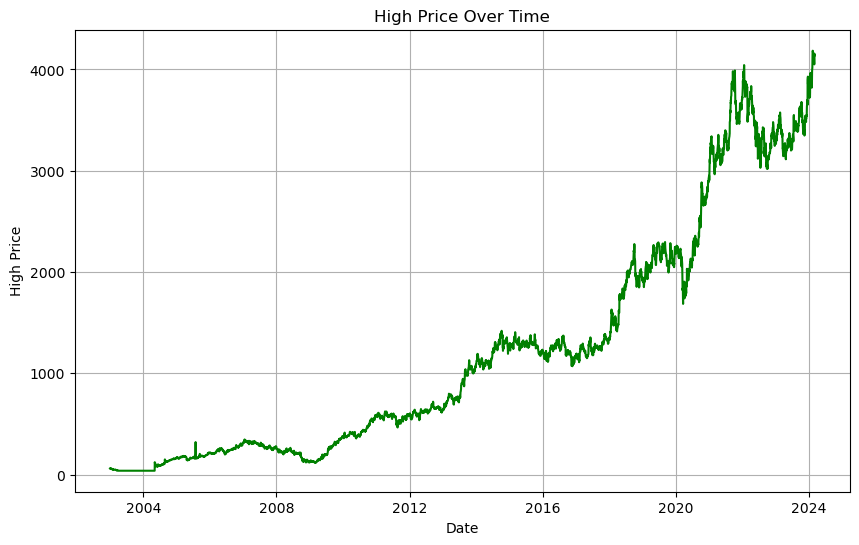

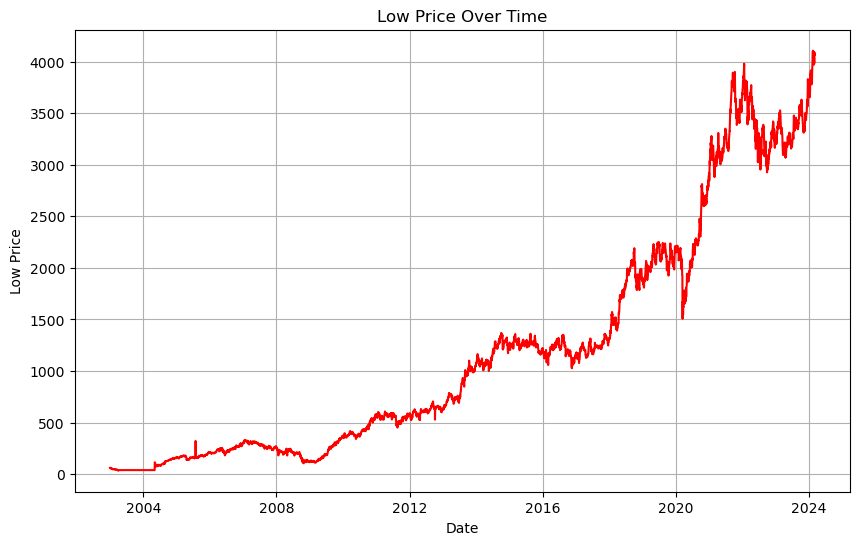

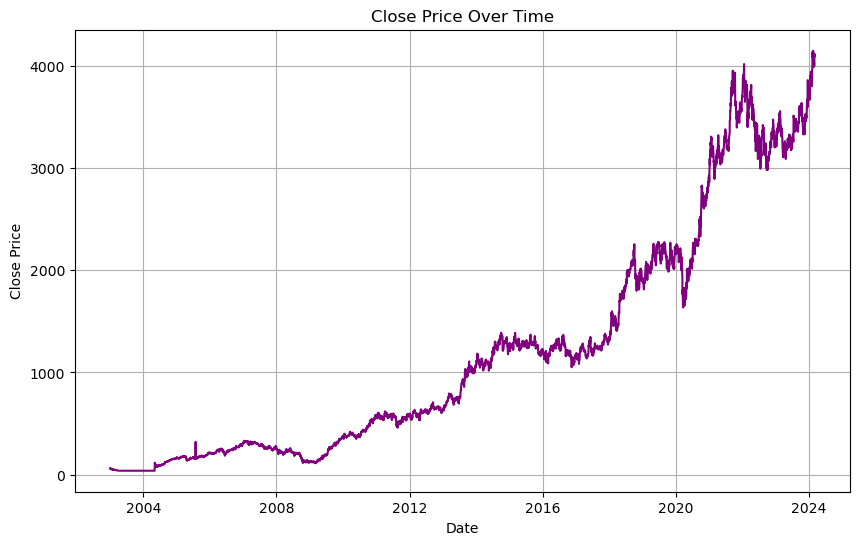

In [19]:
# Plot Open
plt.figure(figsize=(10, 6))
plt.plot(df['Open'], color='blue')
plt.title('Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid(True)
plt.show()

# Plot High
plt.figure(figsize=(10, 6))
plt.plot(df['High'], color='green')
plt.title('High Price Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.grid(True)
plt.show()

# Plot Low
plt.figure(figsize=(10, 6))
plt.plot(df['Low'], color='red')
plt.title('Low Price Over Time')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.grid(True)
plt.show()

# Plot Close
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], color='purple')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

#### The Line Plot for High, Low, Close and Open follows similar pattern of upward trend.

<Figure size 1600x800 with 0 Axes>

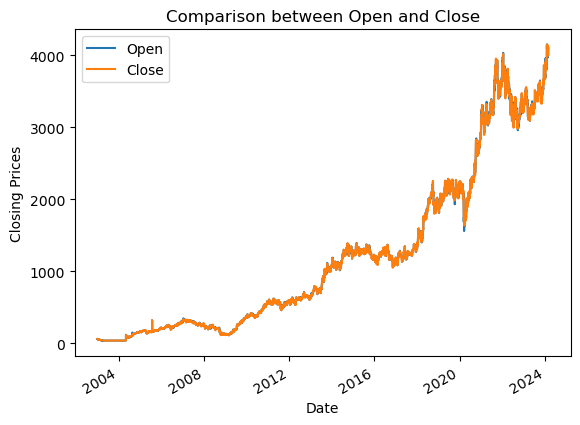

In [20]:
plt.figure(figsize=(16,8))
df[['Open','Close']].plot()
plt.title('Comparison between Open and Close')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.show()

#### The Opening and Closing prices overlap each other indicating not much of a difference between the values.

<Figure size 1600x800 with 0 Axes>

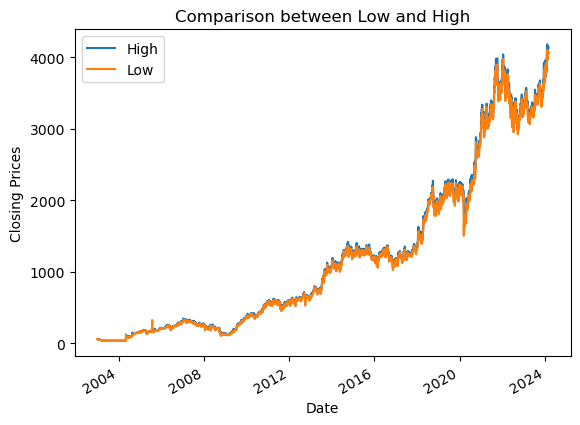

In [21]:
plt.figure(figsize=(16,8))
df[['High','Low']].plot()
plt.title('Comparison between Low and High')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.show()

#### Again ,The High and Low prices overlap each other having not much of a difference between them.

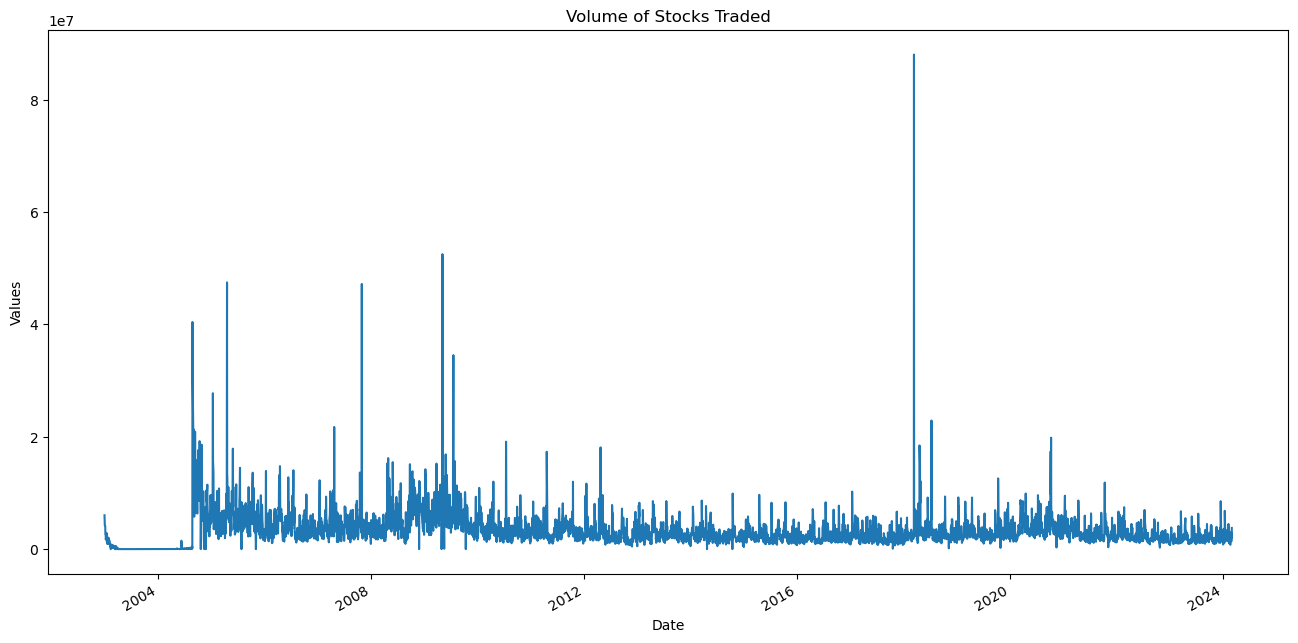

In [22]:
plt.figure(figsize=(16,8))
df['Volume'].plot()
plt.title('Volume of Stocks Traded')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

#### The Maximum Volume of Stocks Traded is in year around 2019 and we saw this in line plot that there was a slight drop in the stock prices.

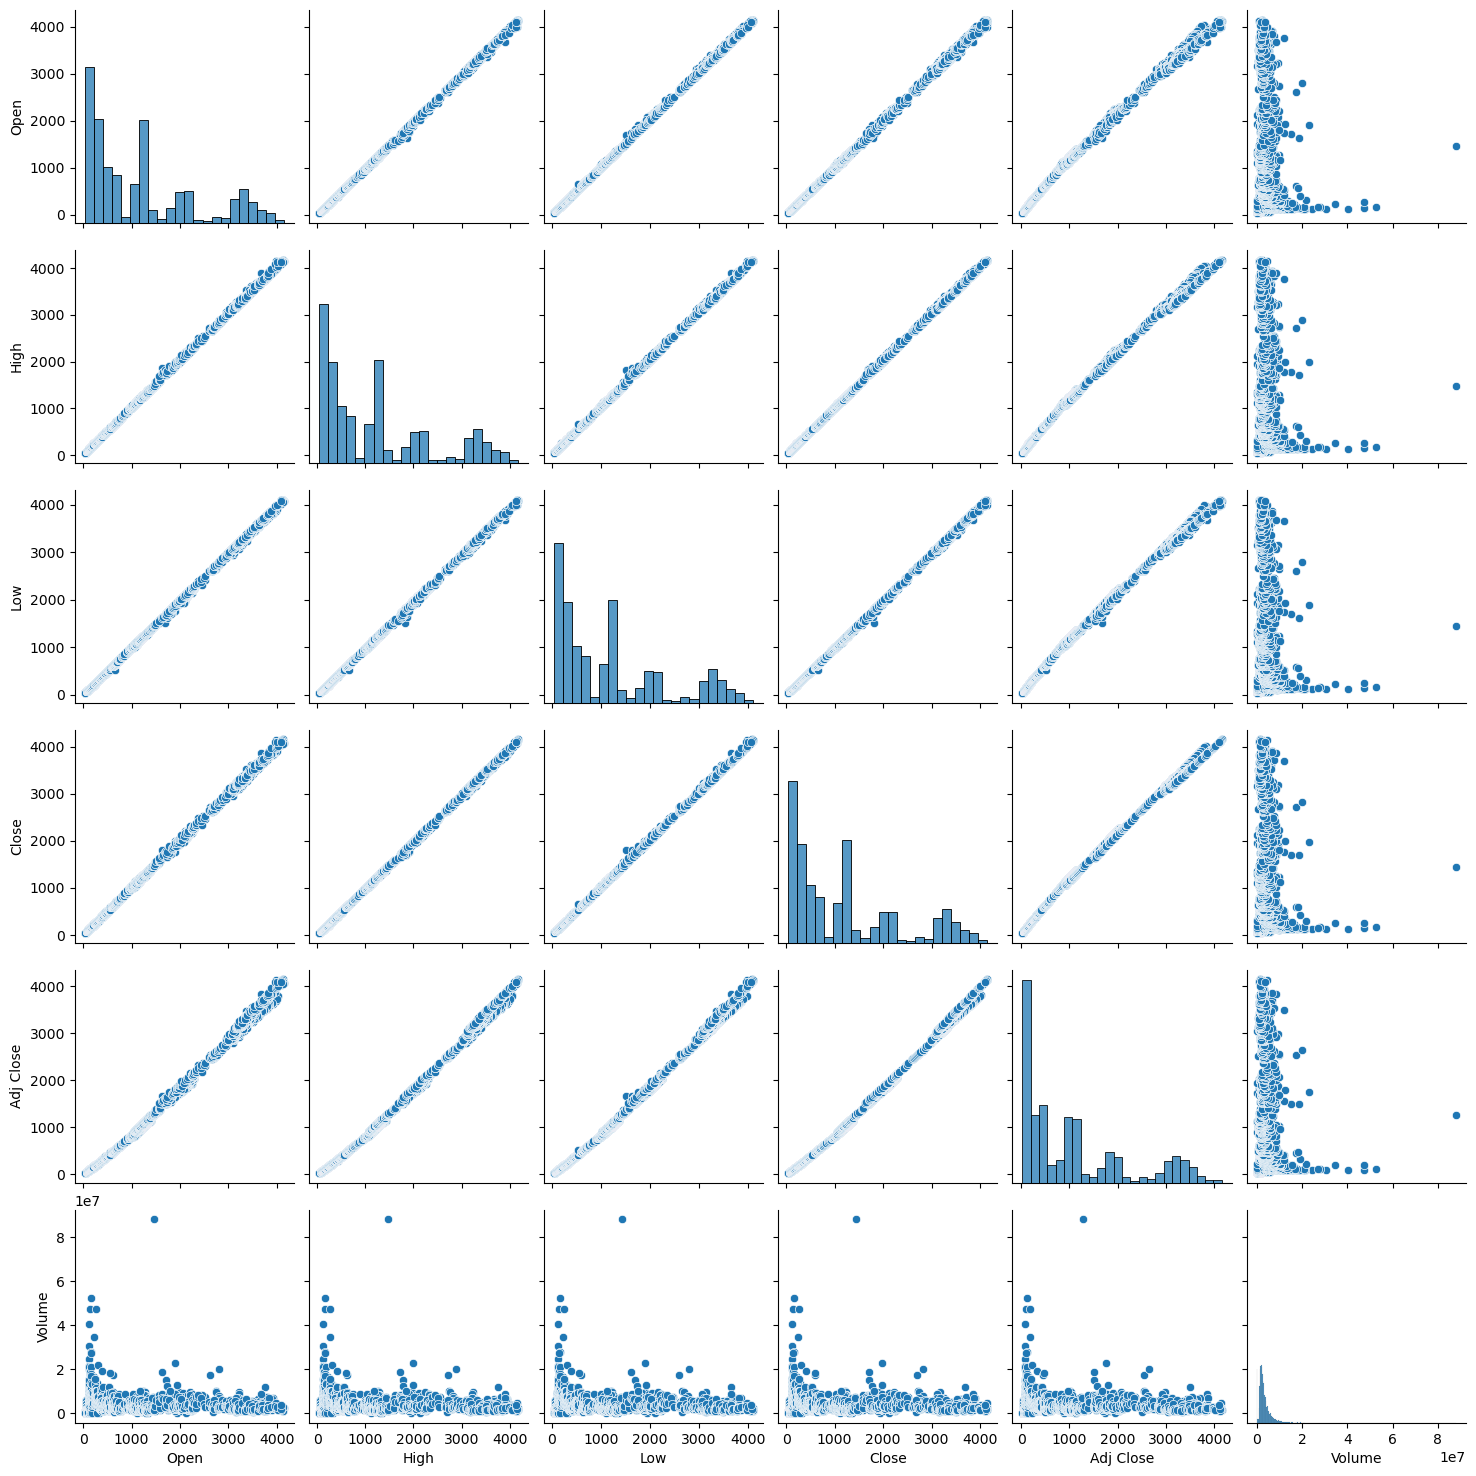

In [23]:
sns.pairplot(df)
plt.show()

#### The Pair Plot suggests a strong relationship among columns Open, High, Low, Close and Adj Close. The relationship of these columns with Volume is similar and it suggests that value for volume does not increase even though values for other columns keep increasing.

In [25]:
df=df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])

#### Since our focus is on closing price prediction , we would drop other columns. The Open, High, Low and  Adj Close have very similar values as we through comparison where values overlap each other.

In [26]:
df.head(1)

,Close
Date,
2003-01-01,61.087502


<Figure size 1600x800 with 0 Axes>

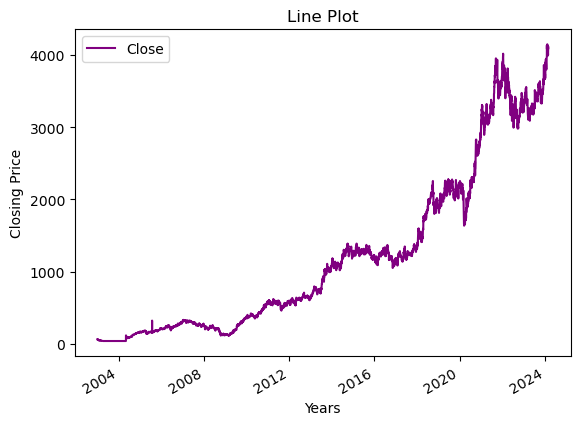

In [27]:
# Line Plot
plt.figure(figsize=(16,8))
df.plot(color='Purple')
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.title('Line Plot')
plt.show()

#### The line plot shows a overall positive trend with few drops in between . The closing price is increasing             w.r.t to time.

<Figure size 1600x800 with 0 Axes>

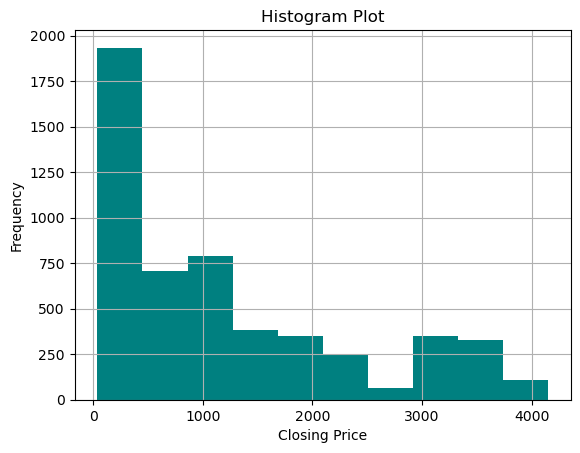

In [28]:
# Histogram Plot
plt.figure(figsize=(16,8))
df.hist(color='Teal')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Histogram Plot')
plt.show()

#### The histogram plots indicates that maximum frequency of Closing Price is for values<1000 and minimum frequency is betwen values 2000 and 3000. It is a right skewed distribution. Change in the shape of the histogram indicate shifts in the distribution of stock prices.

<Figure size 1600x800 with 0 Axes>

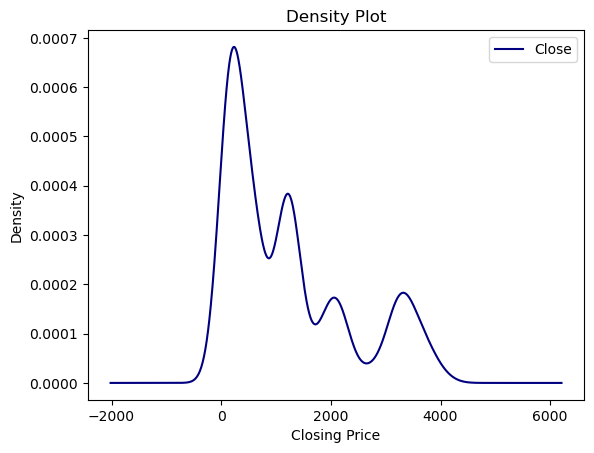

In [29]:
# Density Plot
plt.figure(figsize=(16,8))
df.plot(kind='kde',color='Navy')
plt.xlabel('Closing Price')
plt.ylabel('Density')
plt.title('Density Plot')
plt.show()

#### The density plot shows how likely different closing price levels are within the dataset. Since maximum frequency of  closing prices is < 1000 ,therefore the probability density for them is also higher.

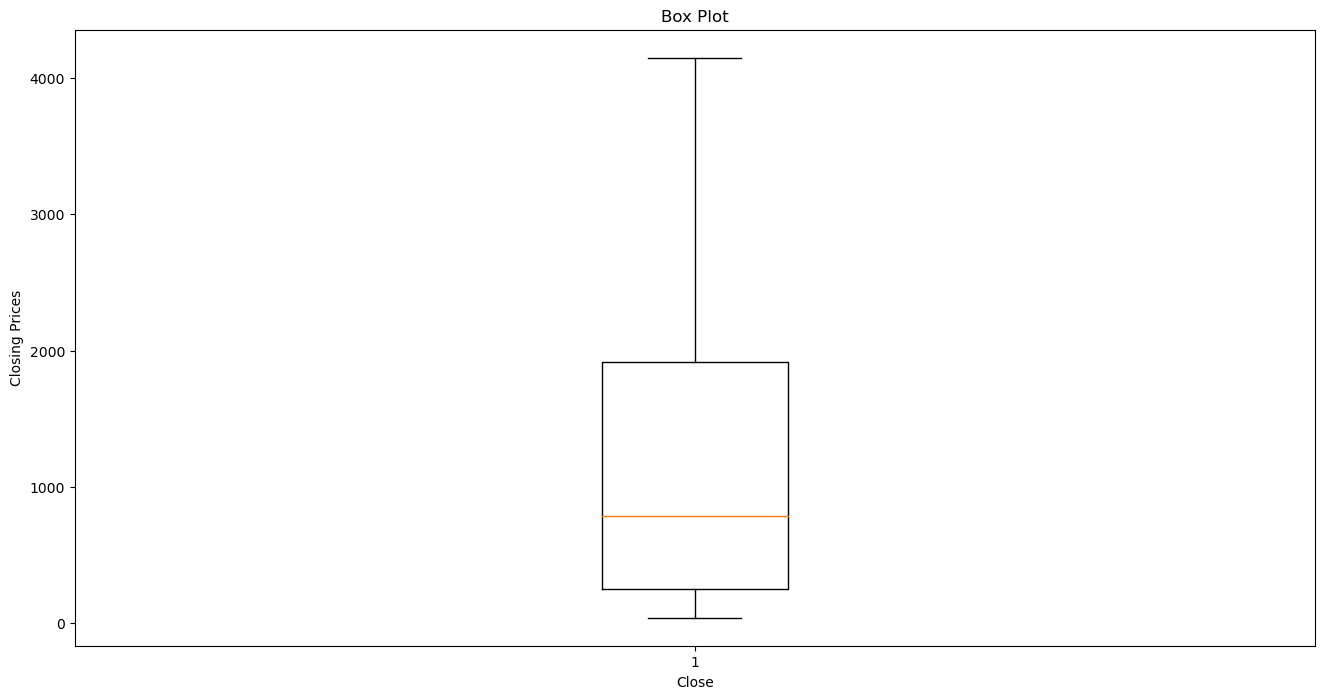

In [30]:
# Box Plot
plt.figure(figsize=(16,8))
plt.boxplot(df)
plt.xlabel('Close')
plt.ylabel('Closing Prices')
plt.title('Box Plot')
plt.show()

#### The box plot shows that there are no outliers in closing price.The median of data is probably around                  800, and it also indicates Positively Skewed data.

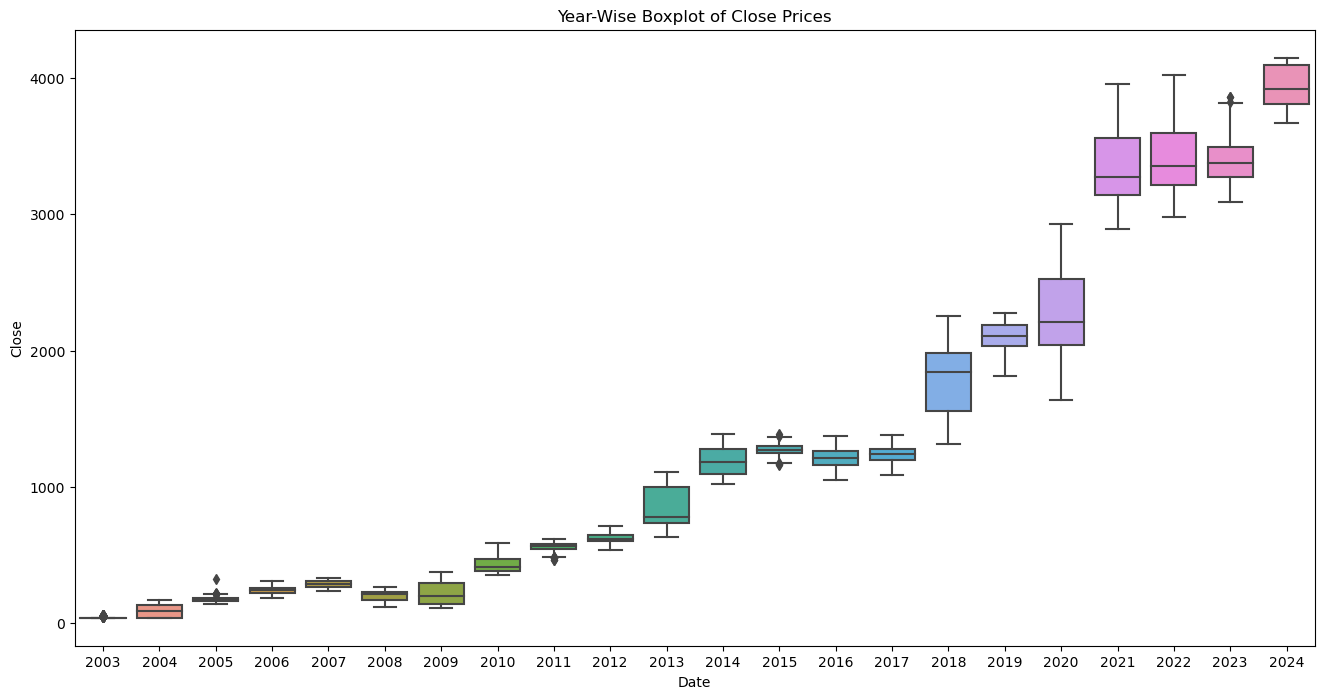

In [31]:
fig,ax = plt.subplots(figsize=(16,8))
sns.boxplot(x = df.index.year,y = tcs.Close,ax =ax)
ax.set_title('Year-Wise Boxplot of Close Prices')
plt.show()

#### There are a few outliers in some years. The size of the Boxplot over the years varies between small to large. For the large box plot it means wider range of close prices for stocks in that particular year compared to others and for small box plot  the majority of close prices were clustered closely together without significant outliers.

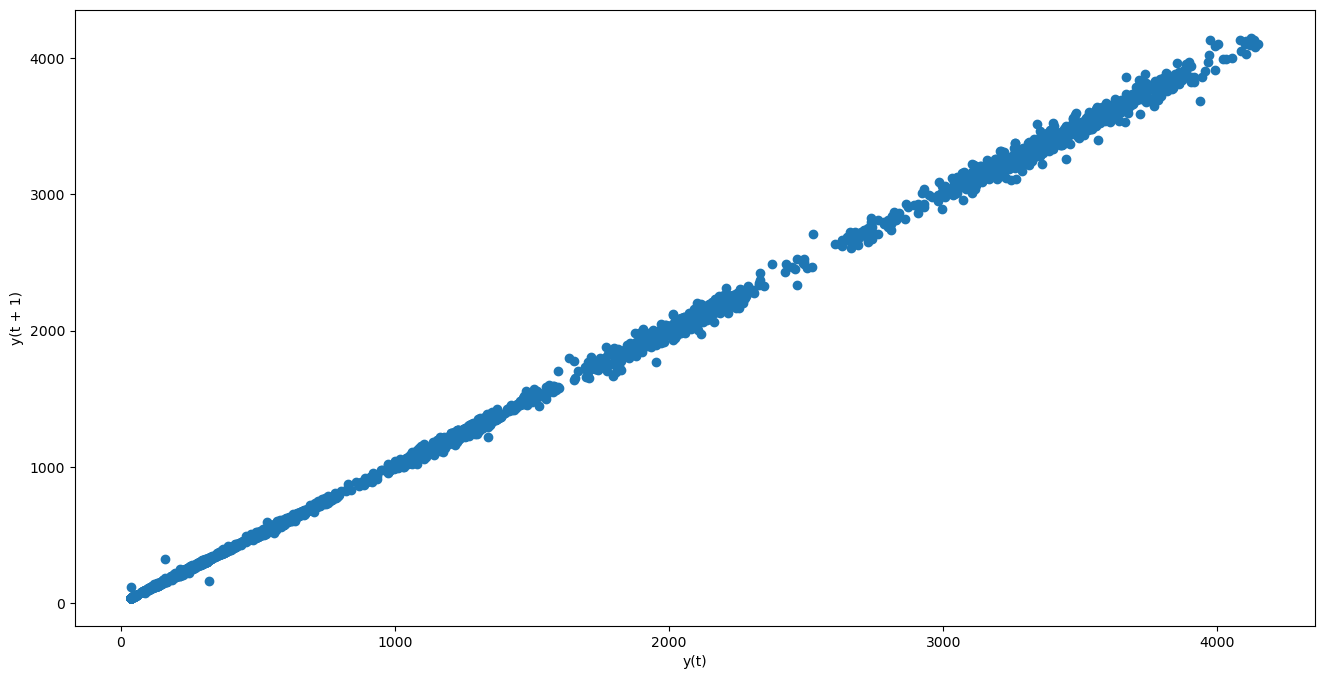

In [32]:
# lag Plot
plt.figure(figsize=(16,8))
lag_plot(df)
plt.show()

#### The points are close to each other and the upward trend indicate that each data point is strongly correlated with its lagged values. Threfore, past observations have a significant influence on current observations, and this influence tends to increase with each data point.

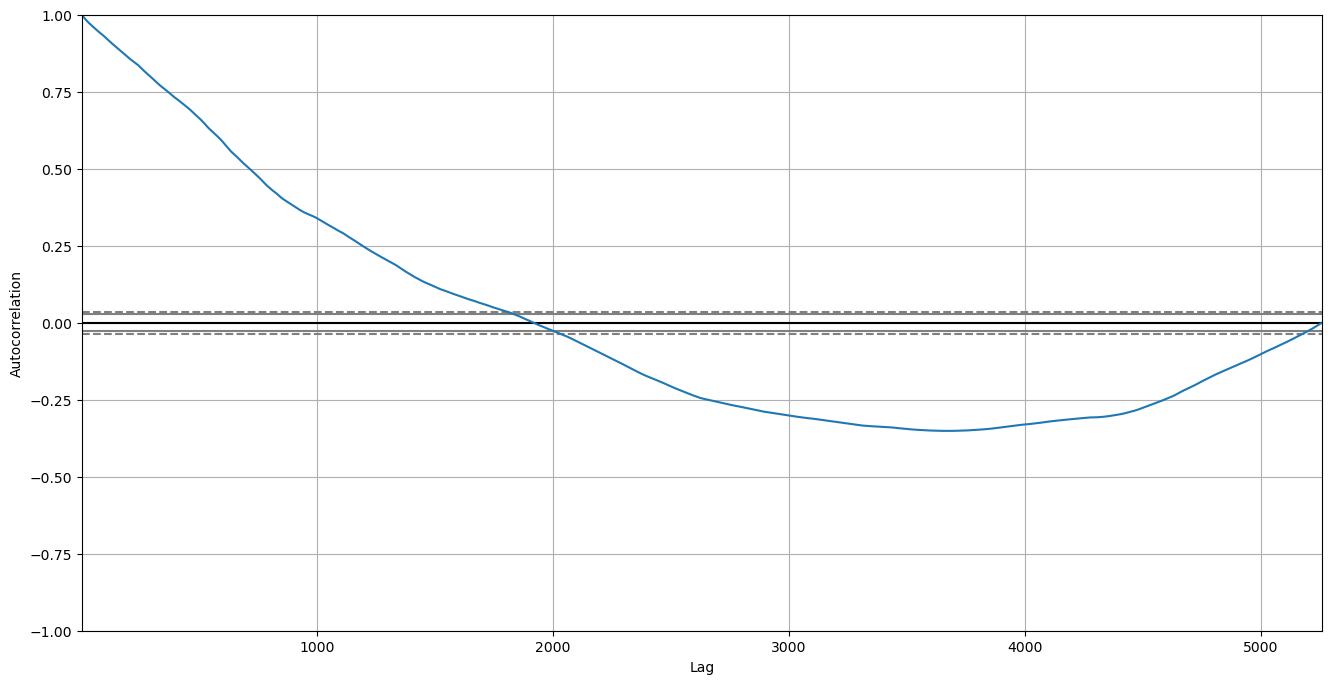

In [33]:
plt.figure(figsize=(16,8))
autocorrelation_plot(df)
plt.show()

#### Autocorrelation measures the correlation between a time series and its lagged values at different lags. The pattern in the plot suggests positive autocorrelation at small lag values, negative autocorrelation at certain lags,which further decreases to 0.It also has the presence of seasonality.

In [34]:
df['Year'] = df.index.year
df['Month'] = df.index.month

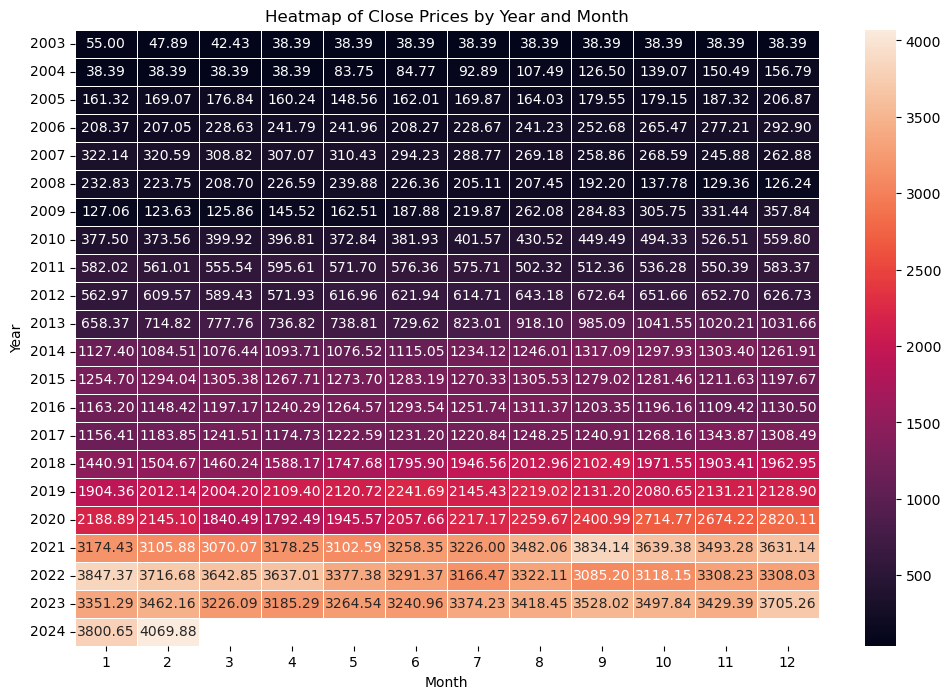

In [35]:
pivot_df = df.pivot_table(index='Year', columns='Month', values='Close', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df,annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap of Close Prices by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

#### The closing prices are high in recent years from 2021. The closing price in Sept-2021 , Jan-2022 , and recent Feb,2024 are relatively higher.

### 4. Feature Engineering

In [36]:
df =pd.read_csv('TCS.csv',header=0,parse_dates=True)
df=df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])

In [37]:
df.isnull().sum()

Date     0
Close    9
dtype: int64

In [38]:
df= df.fillna(method='ffill')

#### We will add three more columns namely ‘Day’, ‘Month’ and ‘Year’ extracted from the ‘Date’ column. These extra features help to gain deeper insights into the data.

In [39]:
splitted = df['Date'].str.split('-', expand=True)
 
df['Year'] = splitted[0].astype('int')
df['Month'] = splitted[1].astype('int')
df['Day'] = splitted[2].astype('int')
 
df.head()

,Date,Close,Year,Month,Day
0,2003-01-01,61.087502,2003,1,1
1,2003-01-02,58.299999,2003,1,2
2,2003-01-03,59.012501,2003,1,3
3,2003-01-06,57.262501,2003,1,6
4,2003-01-07,56.599998,2003,1,7


In [40]:
df['Date'] = pd.to_datetime(df['Date'])

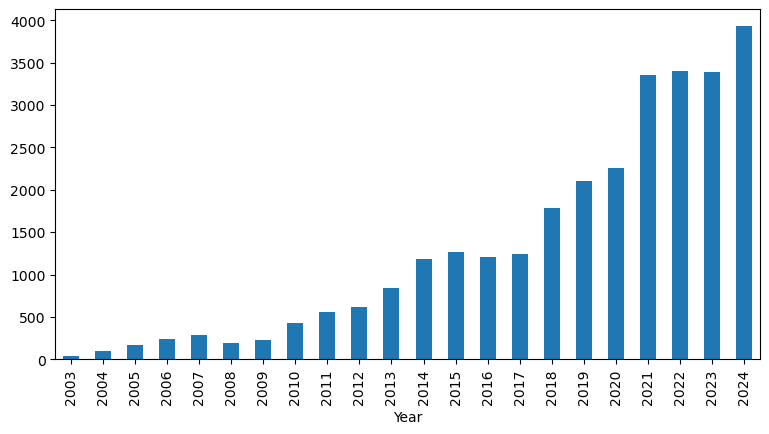

In [41]:
data_grouped = df.groupby('Year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

#### Here we can see the average of stock prices year-wise. The value of stock prices got doubled from 2018 to 2023.

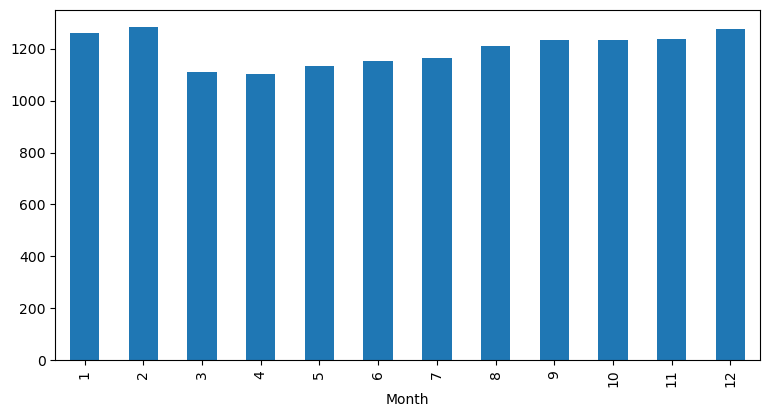

In [42]:
data_grouped = df.groupby('Month').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

#### The following bar plot shows the average of stock prices for each month from year 2003 to 2024. The average value of stock prices does not have major differences between them.

In [43]:
df['Is_Quarter_End'] = np.where(df['Month']%3==0,1,0)
df.sample(5)

,Date,Close,Year,Month,Day,Is_Quarter_End
1413,2008-07-31,208.437500,2008,7,31,0
4507,2021-02-15,3139.850098,2021,2,15,0
4066,2019-05-08,2152.850098,2019,5,8,0
4058,2019-04-24,2183.449951,2019,4,24,0
2050,2011-03-04,567.775024,2011,3,4,1


#### A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. 

In [44]:
df.groupby('Is_Quarter_End')['Close'].describe()

,count,mean,std,min,25%,50%,75%,max
Is_Quarter_End,,,,,,,,
0,3494.0,1204.372595,1134.820905,38.387501,247.295006,782.975006,1914.012451,4149.500000
1,1766.0,1194.072819,1121.173191,38.387501,250.537498,783.662476,1895.112549,3954.550049


#### Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.

In [45]:
df.set_index('Date',inplace=True)

In [46]:
df=df.drop(columns=['Year','Month','Day','Is_Quarter_End'])

#### 4.1 Lag Features

In [47]:
num_lags = 1
# Create lag Features
for i in range(1, num_lags + 1):
    df['Close Lag'] = df['Close'].shift(i)

# Additional Features
# Difference between Each lag and the Current Value
for i in range(1, num_lags + 1):
    df['Close_Lag_Diff'] = df['Close'] - df['Close Lag']

# Percentage change between Each Lag and the Current Value
for i in range(1, num_lags + 1):
    df['Close_Lag_Pct_Change'] = (df['Close'] - df['Close Lag']) / df['Close Lag'] * 100

In [48]:
df.head()

,Close,Close Lag,Close_Lag_Diff,Close_Lag_Pct_Change
Date,,,,
2003-01-01,61.087502,NaN,NaN,NaN
2003-01-02,58.299999,61.087502,-2.787503,-4.563131
2003-01-03,59.012501,58.299999,0.712502,1.222130
2003-01-06,57.262501,59.012501,-1.750000,-2.965473
2003-01-07,56.599998,57.262501,-0.662503,-1.156958


In [49]:
df = df.dropna()

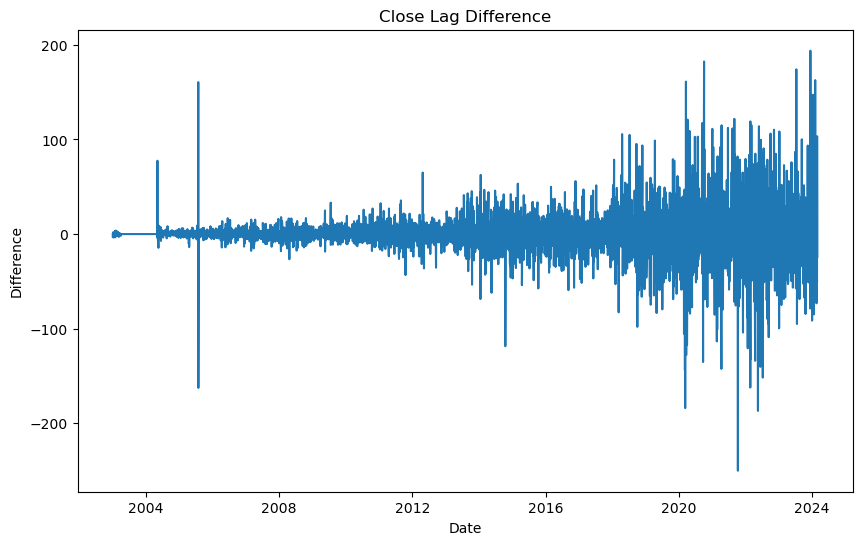

In [50]:
plt.figure(figsize=(10,6))
plt.plot(df.index,df['Close_Lag_Diff'])
plt.title('Close Lag Difference')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

#### The difference of value between the closing prices an its lagged values increases year wise. There is also a data point in 2004 and 2006 that stands out.

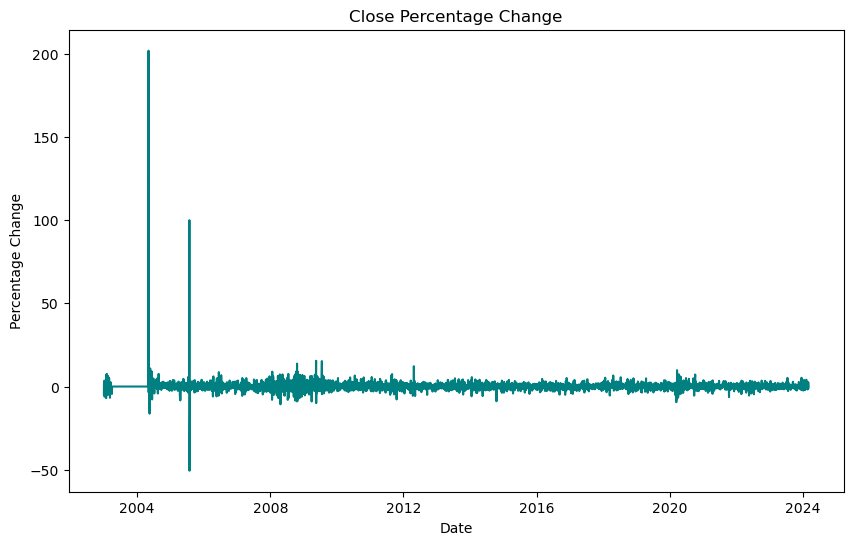

In [51]:
plt.figure(figsize=(10,6))
plt.plot(df.index,df['Close_Lag_Pct_Change'],color='Teal')
plt.title('Close Percentage Change')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.show()

#### The Close Percentage Change value does not change much over time . The data point in 2004 and 2006 that stands out.

In [52]:
Positive_Values = df[df['Close_Lag_Diff']>0]['Close_Lag_Diff'].count()
Negative_Values = df[df['Close_Lag_Diff']<0]['Close_Lag_Diff'].count()

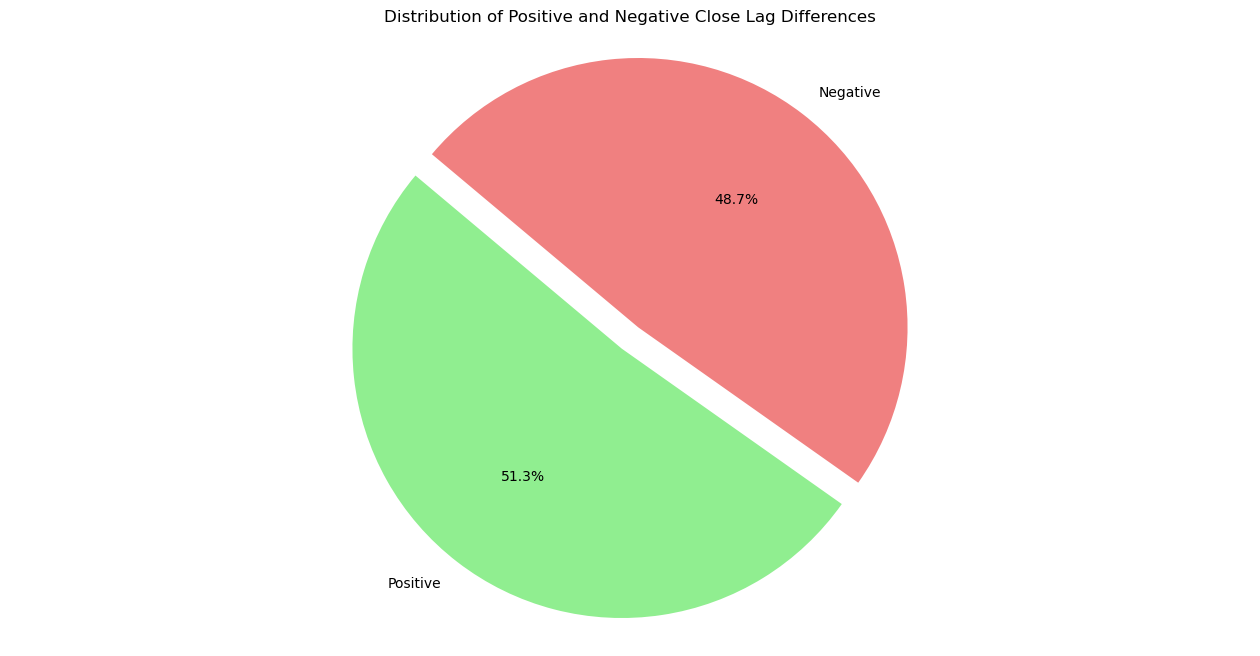

In [53]:
labels = ['Positive', 'Negative']
sizes = [Positive_Values, Negative_Values]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)
plt.figure(figsize=(16,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Positive and Negative Close Lag Differences')
plt.axis('equal')  
plt.show()

#### 4.2  Time Series Decomposition Plot

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [55]:
df1=tcs.copy()
df1=df1.drop(columns=['Open','High','Low','Adj Close','Volume'])

In [56]:
df1=df1.asfreq('B')
df1= df1.fillna(method='ffill')

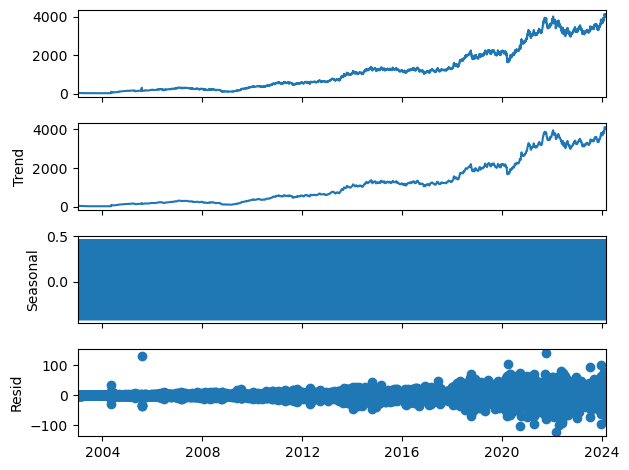

In [57]:
decompose_ts = seasonal_decompose(df1)  
decompose_ts.plot()
plt.show()

#### Now we can see trend, seasonality and residual. The seasonality is dense because we have set the data's frequency as Business Days so we have a lot of data points.

#### 4.2 UpSampling

In [58]:
upsampled = df1.resample('M').mean()

In [59]:
interpolated = upsampled.interpolate(method='linear')

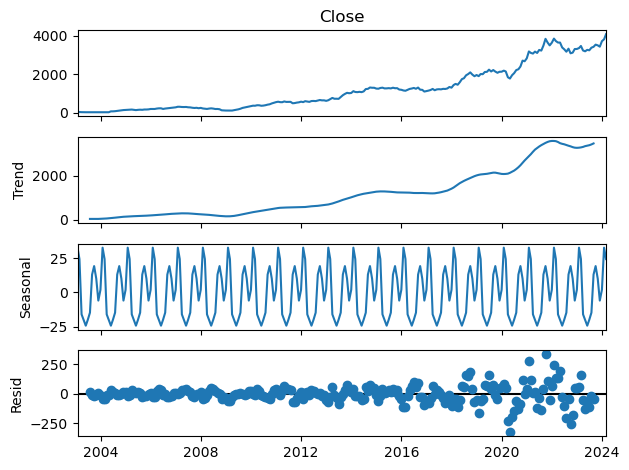

In [60]:
decompose_interpolated= seasonal_decompose(interpolated.Close)  
decompose_interpolated.plot()
plt.show()

#### Now we can see the seasonality clearly.

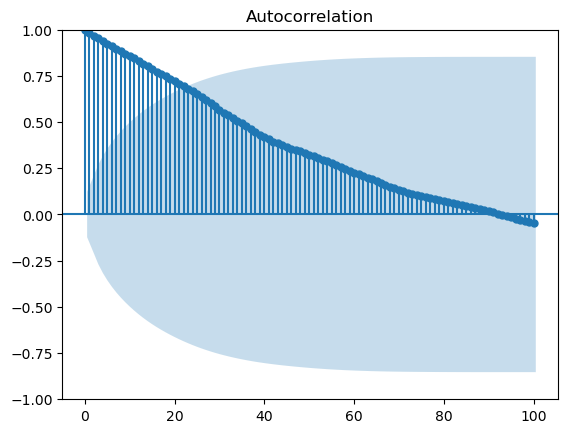

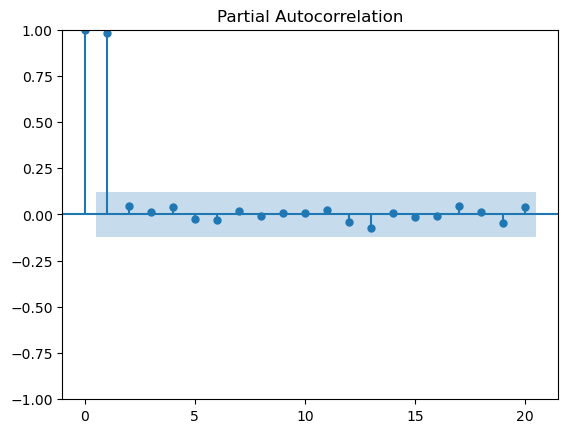

In [61]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(interpolated.Close,lags=100)
tsa_plots.plot_pacf(interpolated.Close,lags=20)
plt.show()

####  The visualization is for data resampled to monthly frequency.  The pattern in the  autocorrelation plot suggests positive autocorrelation at small lag values which decreases as lag value increases. For the partial autocorrelation plot it suggests the suitability of an autoregressive model with a lag orderof 2 .

#### 4.3 Moving Average

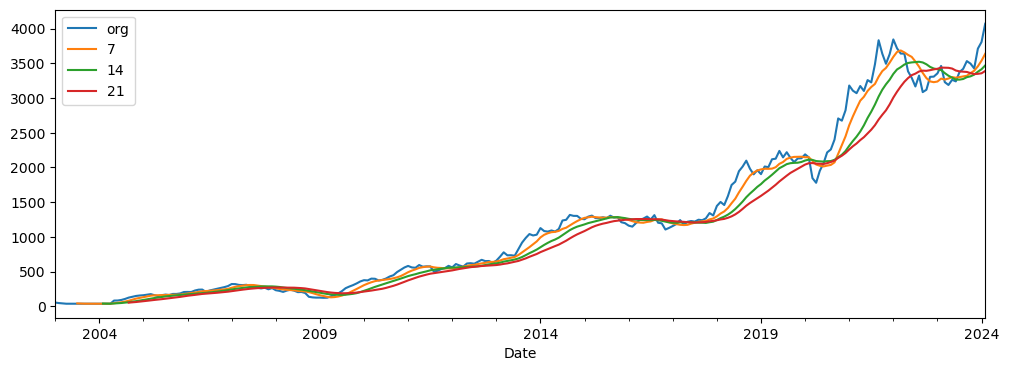

In [62]:
plt.figure(figsize=(12,4))
interpolated.Close.plot(label="org")
for i in range(7,25,7):
    interpolated["Close"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### 5. Model Building

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
from numpy import math

In [64]:
df1.head()

,Close
Date,
2003-01-01,61.087502
2003-01-02,58.299999
2003-01-03,59.012501
2003-01-06,57.262501
2003-01-07,56.599998


In [65]:
df1.shape

(5522, 1)

In [66]:
train=df1.iloc[:-1522]
test=df1.iloc[-1522:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(4000, 1) (1522, 1)
Close    1749.875
Name: 2018-05-02 00:00:00, dtype: float64 Close    4095.100098
Name: 2024-02-29 00:00:00, dtype: float64


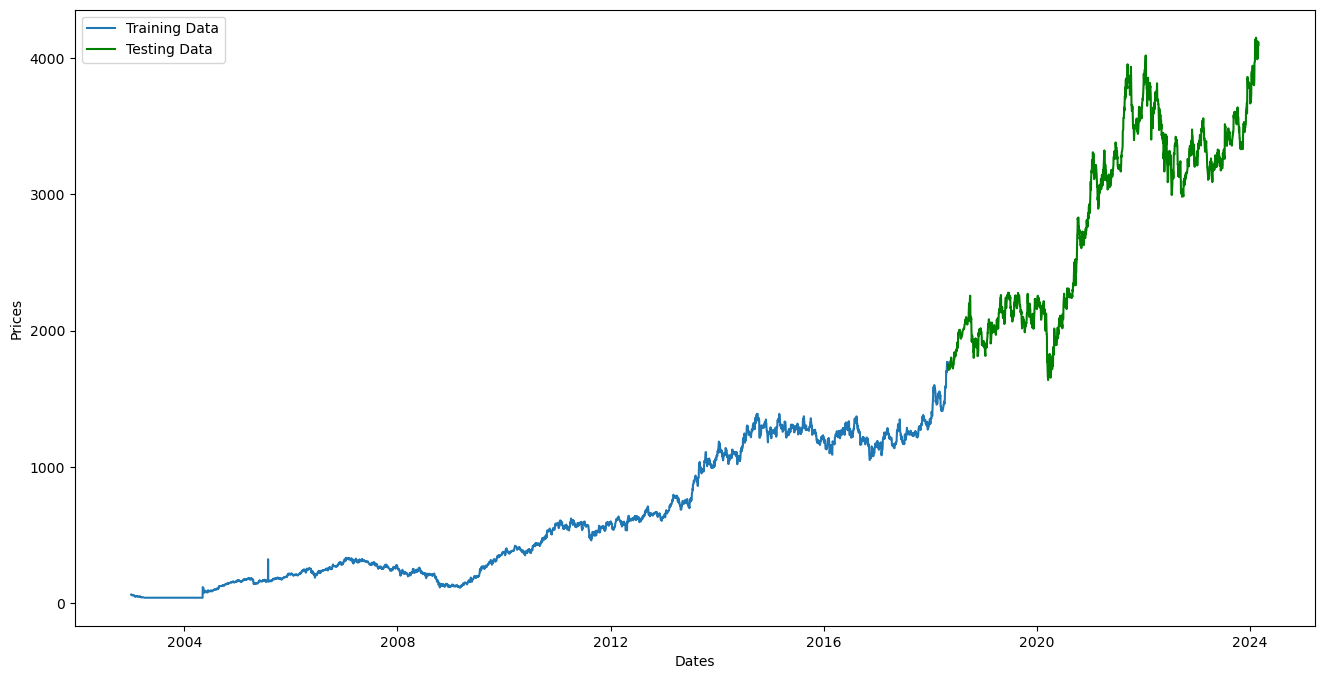

In [67]:
plt.figure(figsize=(16,8))
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train, label='Training Data')
plt.plot(test,'green', label='Testing Data')
plt.legend()

In [68]:
train_values = train.values
test_values = test.values

#### 5.1 ARIMA

#### Check For Stationarity

In [69]:
from statsmodels.tsa.stattools import adfuller

In [70]:
def adf_test(df1):
    ## H0: Data is not Stationary
    ## H1: Data is Stationary
    if adfuller(df1)[1] > 0.05:
        print("Failed to reject the null hypothesis")
        print('Data is Not stationary')
    else:
        print("Reject the null hypothesis")
        print("Data is stationary")

In [71]:
adf_test(df1)

Failed to reject the null hypothesis
Data is Not stationary


In [72]:
from statsmodels.tsa.statespace.tools import diff

In [73]:
df_1 = diff(df1,k_diff=1)

In [74]:
adf_test(df_1)

Reject the null hypothesis
Data is stationary


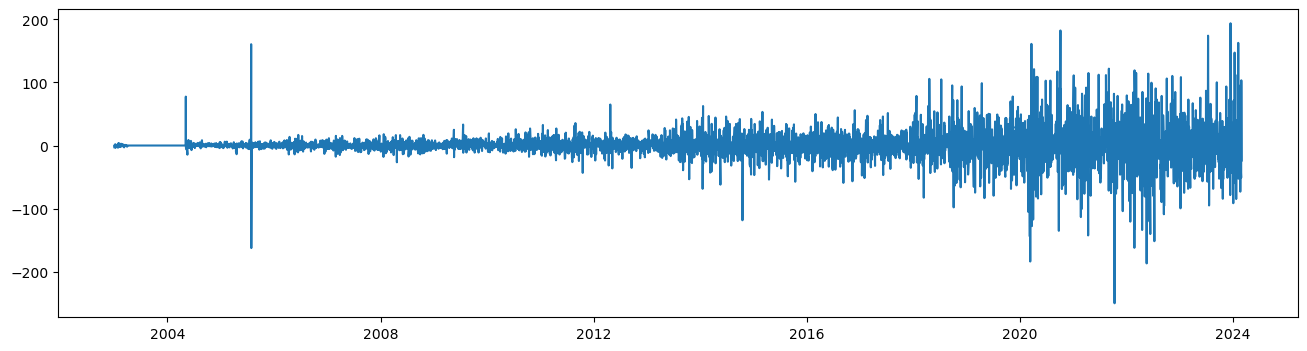

In [75]:
plt.figure(figsize=(16,4))
plt.plot(df_1)
plt.show()

#### Figure Out Order for ARIMA Model

In [76]:
from pmdarima import auto_arima

In [77]:
auto_model = auto_arima(df1,suppress_warnings=True)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5522
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -25271.970
Date:                Tue, 19 Mar 2024   AIC                          50555.939
Time:                        16:44:49   BIC                          50595.637
Sample:                    01-01-2003   HQIC                         50569.783
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2980      0.560      2.317      0.020       0.200       2.396
ar.L1          0.1554      0.015     10.469      0.000       0.126       0.184
ar.L2         -0.9400      0.015    -62.651      0.000      -0.969      -0.911
ma.L1         -0.1512      0.017     -8.648      0.000      -0.185      -0.117
ma.L2          0.9141      0.018     51.655      0.000       0.879       0.949
sigma2       553.6907      3.781    146.423      0.000     546.279     561.102
===================================================================================
Ljung-Box (L1) (Q):                   1.14   Jarque-Bera (JB):             42463.73
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):              27.22   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Train the Model

In [78]:
from statsmodels.tsa.arima.model import ARIMA

#### Rolling Window Approach

In [79]:
history = [x for x in train_values]
print(type(history))
predictions = list()
for t in range(len(test_values)):
    model = ARIMA(history, order=(1,1,2))
    model_fit = model.fit()
    output = model_fit.predict(start=len(train_values)+t-1, end = len(train_values)+t,dynamic=True)
    yhat = output[0]
    predictions.append(yhat)
    obs = test_values[t]
    history.append(obs)
    
error_arima1 = mean_squared_error(test_values, predictions)
print('MSE : %.3f' % error_arima1)

error_arima2 = math.sqrt(error_arima1)
print('RMSE : %.3f' % error_arima2)

error_arima3=mean_absolute_percentage_error(test_values, predictions)
print('MAPE : %.3f' % error_arima3)

<class 'list'>
MSE : 3268.709
RMSE : 57.173
MAPE : 0.015


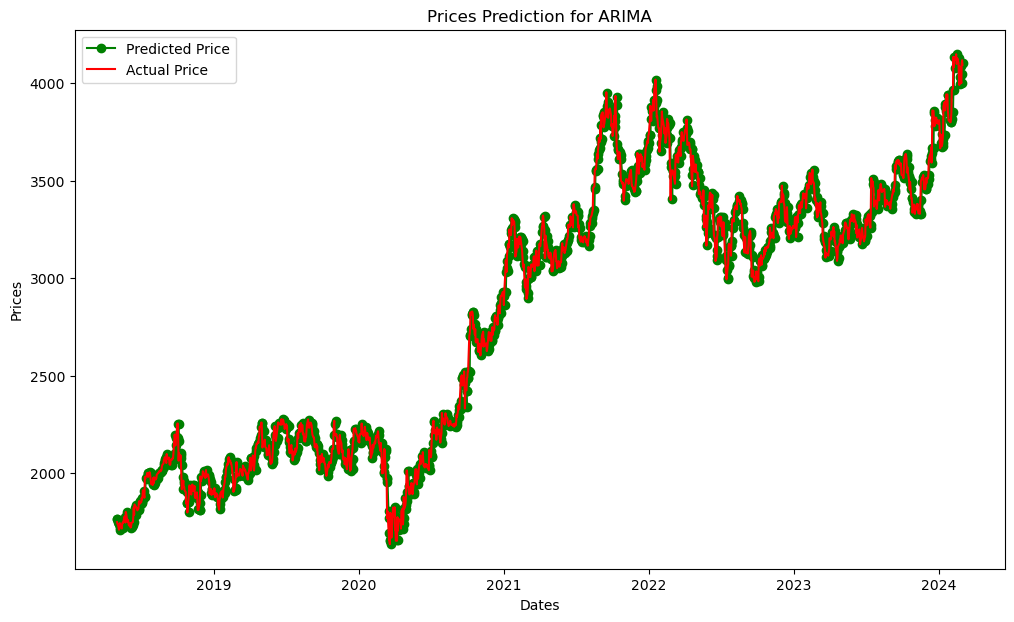

In [80]:
plt.figure(figsize=(12,7))
plt.plot(test.index, predictions, color='green', marker='o',label='Predicted Price')
plt.plot(test.index, test, color='red', label='Actual Price')
plt.title('Prices Prediction for ARIMA')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend() 

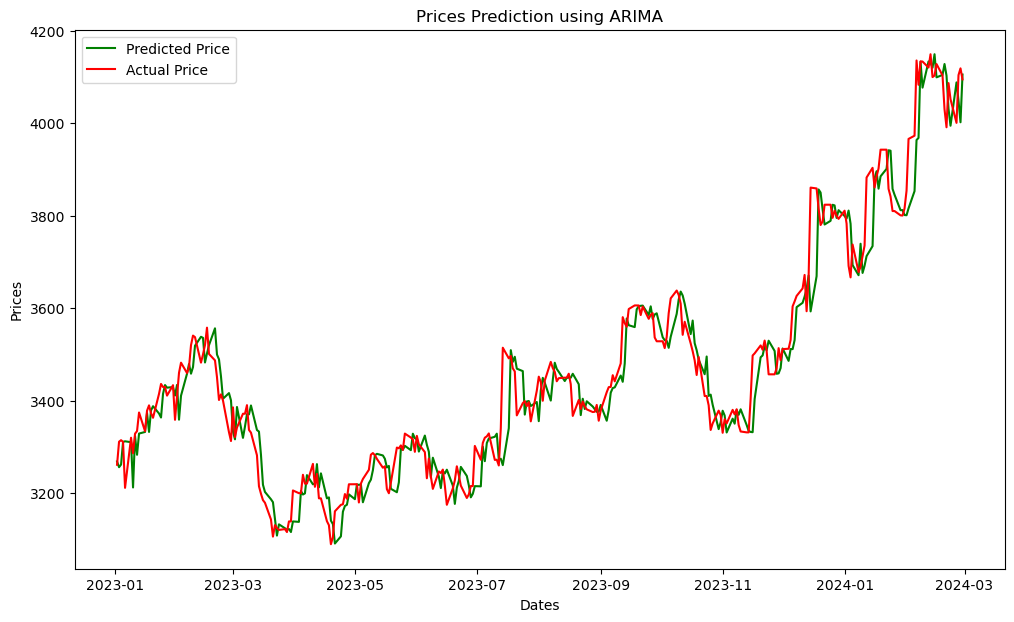

In [81]:
predictions_array = np.array(predictions)

Test_2023= test['2023':'2024']
Predictions_2023= predictions_array[-len(Test_2023):]
plt.figure(figsize=(12,7))
plt.plot(Test_2023.index, Predictions_2023, color='green', label='Predicted Price')
plt.plot(Test_2023.index, Test_2023, color='red', label='Actual Price')
plt.title('Prices Prediction using ARIMA')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

#### 5.2 Simple Exponential Smoothing(SES)

In [82]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 

In [83]:
history = [x for x in train_values]
print(type(history))
predictions_ses_model = list()
for t in range(len(test_values)):
    ses_model = SimpleExpSmoothing(history).fit(smoothing_level=0.2)
    
    output =  ses_model.predict(start=len(train_values)+t-1, end = len(train_values)+t)
    
    yhat = output[0]
    predictions_ses_model.append(yhat)
    obs = test_values[t]
    history.append(obs)
    
error_ses1 = mean_squared_error(test_values, predictions_ses_model)
print('MSE : %.3f' % error_ses1)

error_ses2 = math.sqrt(error_ses1)
print('RMSE : %.3f' % error_ses2)

error_ses3 = mean_absolute_percentage_error(test_values, predictions_ses_model)
print('MAPE : %.3f' % error_ses3)

<class 'list'>
MSE : 5737.489
RMSE : 75.746
MAPE : 0.021


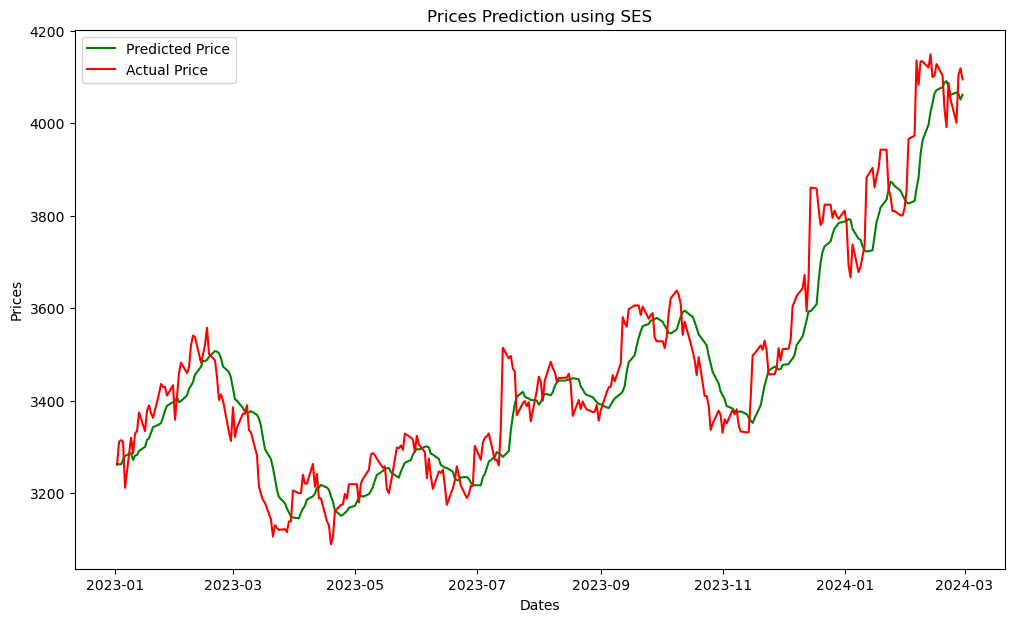

In [84]:
predictions_ses_model_array = np.array(predictions_ses_model)

Test_2023 = test['2023':'2024']
Predictions_2023 = predictions_ses_model_array[-len(Test_2023):]
plt.figure(figsize=(12,7))
plt.plot(Test_2023.index, Predictions_2023, color='green', label='Predicted Price')
plt.plot(Test_2023.index, Test_2023, color='red', label='Actual Price')
plt.title('Prices Prediction using SES')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

#### 5.2 Holt's Method (Double Exponential Smoothing)

In [85]:
from statsmodels.tsa.holtwinters import Holt 

In [86]:
history = [x for x in train_values]
print(type(history))
predictions_hw_model = list()
for t in range(len(test_values)):
    hw_model =  Holt(history).fit(smoothing_level=0.1, smoothing_slope=0.2)
    
    output = hw_model.predict(start=len(train_values)+t-1, end = len(train_values)+t)
    
    yhat = output[0]
    predictions_hw_model.append(yhat)
    obs = test_values[t]
    history.append(obs)
    
error_h1 = mean_squared_error(test_values, predictions_hw_model)
print('MSE : %.3f' % error_h1)

error_h2 = math.sqrt(error_h1)
print('RMSE : %.3f' % error_h2)

error_h3=mean_absolute_percentage_error(test_values, predictions_hw_model)
print('MAPE : %.3f' % error_h3)

<class 'list'>
MSE : 9538.326
RMSE : 97.664
MAPE : 0.029


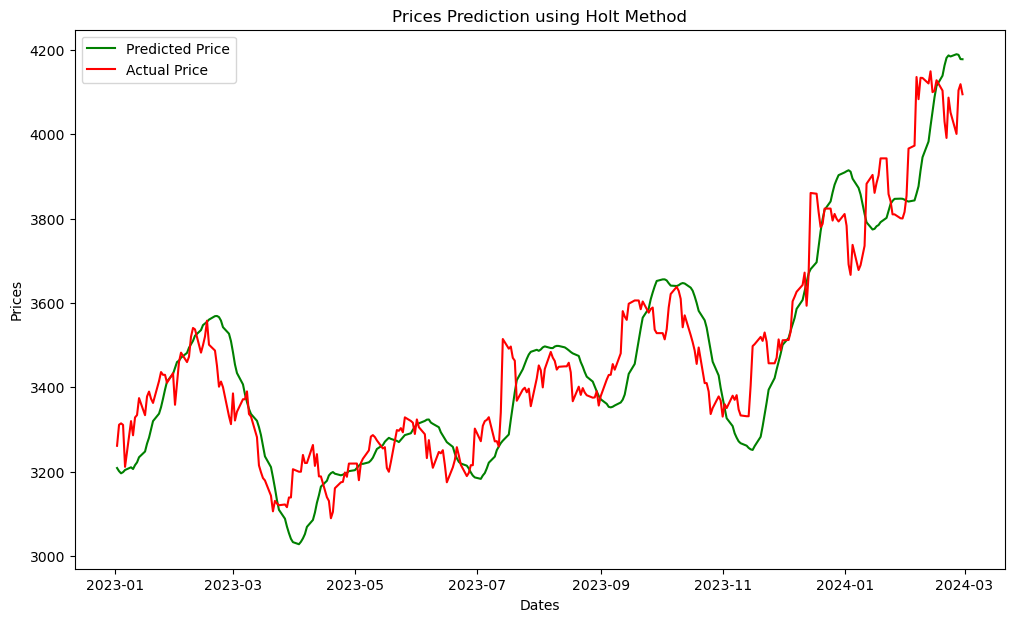

In [87]:
predictions_hw_model_array = np.array(predictions_hw_model)

Test_2023 = test['2023':'2024']
Predictions_2023 =predictions_hw_model_array[-len(Test_2023):]
plt.figure(figsize=(12,7))
plt.plot(Test_2023.index, Predictions_2023, color='green', label='Predicted Price')
plt.plot(Test_2023.index, Test_2023, color='red', label='Actual Price')
plt.title('Prices Prediction using Holt Method')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

#### 5.3 Holt-Winters Method (Triple Exponential Smoothing)

In [88]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [89]:
history = [x for x in train_values]
print(type(history))
predictions_hwe_model_add_add = list()
for t in range(len(test_values)):
    hwe_model_add_add =  ExponentialSmoothing(history,seasonal="add",trend="add",seasonal_periods=365).fit(smoothing_level=0.1, smoothing_slope=0.2)
    
    output = hwe_model_add_add.predict(start=len(train_values)+t-1, end = len(train_values)+t)
    
    yhat = output[0]
    predictions_hwe_model_add_add.append(yhat)
    obs = test_values[t]
    history.append(obs)
error_hw1 = mean_squared_error(test_values, predictions_hwe_model_add_add)
print('MSE : %.3f' % error_hw1)

error_hw2 = math.sqrt(error_hw1)
print('RMSE : %.3f' % error_hw2)

error_hw3=mean_absolute_percentage_error(test_values, predictions_hwe_model_add_add)
print('MAPE : %.3f' % error_hw3)

<class 'list'>
MSE : 9065.571
RMSE : 95.213
MAPE : 0.028


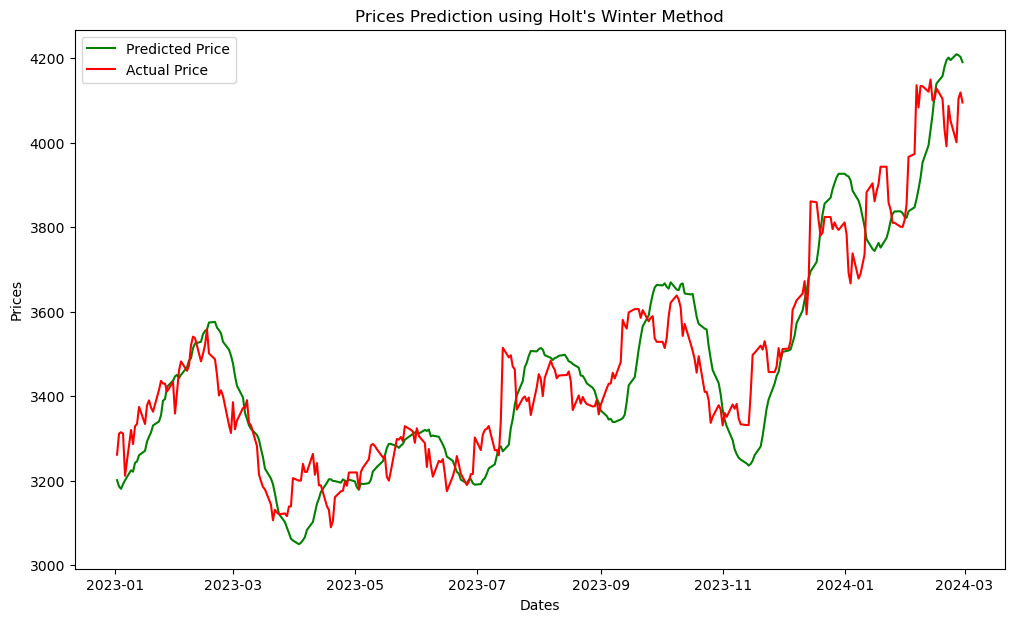

In [90]:
predictions_hwe_model_add_add_array = np.array( predictions_hwe_model_add_add)

Test_2023 = test['2023':'2024']
Predictions_2023 = predictions_hwe_model_add_add_array[-len(Test_2023):]
plt.figure(figsize=(12,7))
plt.plot(Test_2023.index, Predictions_2023, color='green', label='Predicted Price')
plt.plot(Test_2023.index, Test_2023, color='red', label='Actual Price')
plt.title('''Prices Prediction using Holt's Winter Method''')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

#### 5.4 LSTM

In [91]:
len(df1)

5522

In [92]:
training_data_len = math.ceil(len(df1)*.8)
training_data_len

4418

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [94]:
df1.head(),df1.tail()

(                Close
 Date                 
 2003-01-01  61.087502
 2003-01-02  58.299999
 2003-01-03  59.012501
 2003-01-06  57.262501
 2003-01-07  56.599998,
                   Close
 Date                   
 2024-02-23  4052.100098
 2024-02-26  4001.050049
 2024-02-27  4104.399902
 2024-02-28  4118.950195
 2024-02-29  4095.100098)

In [95]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1)

scaled_data, scaled_data.shape

(array([[0.00552162],
        [0.00484358],
        [0.00501689],
        ...,
        [0.98902971],
        [0.99256897],
        [0.9867676 ]]),
 (5522, 1))

In [96]:
# Create the Training Data Set
train_data = scaled_data[0:training_data_len,:]
## Split the Data into Train and Test
x_train = []
y_train = []

for i in range(50, len(train_data)):
    x_train.append(train_data[i-50:i,0])
    y_train.append(train_data[i,0])
    if i <= 51:
        print(x_train)
        print(y_train)
        print()

print(len(x_train))
print(len(y_train))

[array([0.00552162, 0.00484358, 0.00501689, 0.00459121, 0.00443007,
       0.00492263, 0.0050625 , 0.00418074, 0.00431757, 0.0045    ,
       0.00477669, 0.00497736, 0.00465507, 0.00420811, 0.0038554 ,
       0.00391317, 0.00342669, 0.00297061, 0.00211317, 0.00291284,
       0.00256622, 0.00274865, 0.00245676, 0.00335676, 0.00295844,
       0.0027304 , 0.00297365, 0.00285507, 0.00245068, 0.00234426,
       0.00218919, 0.00218919, 0.0016054 , 0.00230169, 0.00223176,
       0.00223784, 0.00220135, 0.00200067, 0.00207061, 0.00180304,
       0.00160845, 0.00177567, 0.00235034, 0.00222263, 0.00193378,
       0.00197939, 0.0016723 , 0.0013652 , 0.00064155, 0.00088176])]
[0.000729729483377]

[array([0.00552162, 0.00484358, 0.00501689, 0.00459121, 0.00443007,
       0.00492263, 0.0050625 , 0.00418074, 0.00431757, 0.0045    ,
       0.00477669, 0.00497736, 0.00465507, 0.00420811, 0.0038554 ,
       0.00391317, 0.00342669, 0.00297061, 0.00211317, 0.00291284,
       0.00256622, 0.00274865, 0.0024

In [97]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [98]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(4368, 50, 1)

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#### Build the LSTM Model

In [100]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(64))
model.add(Dense(1))

In [101]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [102]:
model.fit(x_train, y_train, batch_size=1, epochs=5)    

Epoch 1/5

4368/4368 [==============================] - 117s 26ms/step - loss: 3.4955e-04
Epoch 2/5
4368/4368 [==============================] - 112s 26ms/step - loss: 1.4074e-04
Epoch 3/5
4368/4368 [==============================] - 110s 25ms/step - loss: 1.0550e-04
Epoch 4/5
4368/4368 [==============================] - 111s 25ms/step - loss: 8.9582e-05
Epoch 5/5
4368/4368 [==============================] - 112s 26ms/step - loss: 7.6079e-05


In [103]:
test_data = scaled_data[training_data_len-50:, :]

x_test = []
y_test = df1.iloc[training_data_len:, :]  

for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i, 0])

In [104]:
x_test = np.array(x_test)

In [105]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [106]:
# Get the Model Predicted Price Values
predictions = model.predict(x_test)

35/35 [==============================] - 2s 34ms/step


In [107]:
predictions = scaler.inverse_transform(predictions)

In [108]:
print(predictions[0:5], y_test[0:5])

[[2157.0852]
 [2091.1223]
 [2046.5219]
 [2084.6587]
 [2066.0583]]                   Close
Date                   
2019-12-09  2060.449951
2019-12-10  2012.849976
2019-12-11  2041.900024
2019-12-12  2020.900024
2019-12-13  2071.250000


In [109]:
# Mean Squared Error (MSE)
mse = np.mean((predictions - y_test) ** 2)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

mse, rmse

(2824.195350540958, 53.143159019209214)

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [111]:
error_lstm1 = mean_squared_error(y_test,predictions)
print('MSE : %.3f' % error_lstm1)

error_lstm2 = math.sqrt(error_lstm1)
print('RMSE : %.3f' % error_lstm2)

error_lstm3=mean_absolute_percentage_error(y_test,predictions)
print('MAPE : %.3f' % error_lstm3)

MSE : 2824.195
RMSE : 53.143
MAPE : 0.014


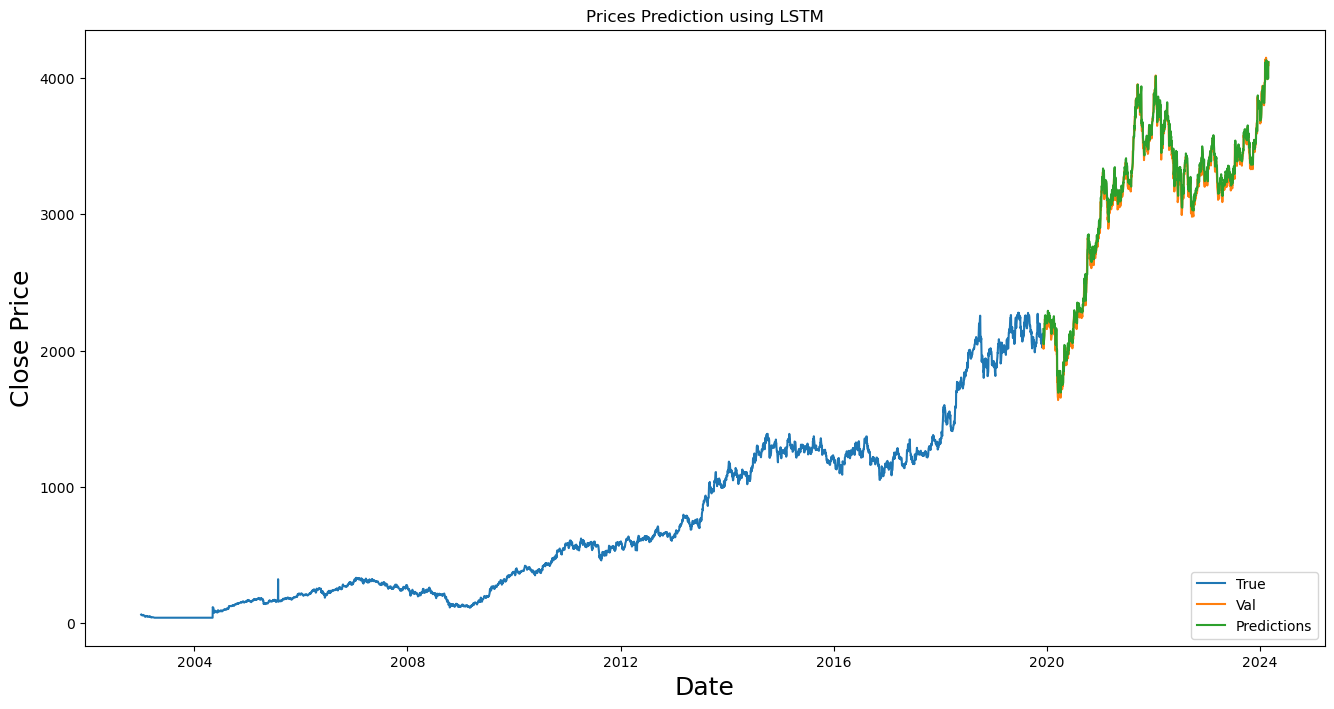

In [112]:
# Plot the Data
train = df1[:training_data_len]
valid = df1[training_data_len:]
valid['Predictions'] = predictions

# Visualize the Data
plt.figure(figsize=(16,8))
plt.title('Prices Prediction using LSTM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Training Data', 'Testing Data', 'Predictions'], loc = 'lower right')
plt.show()

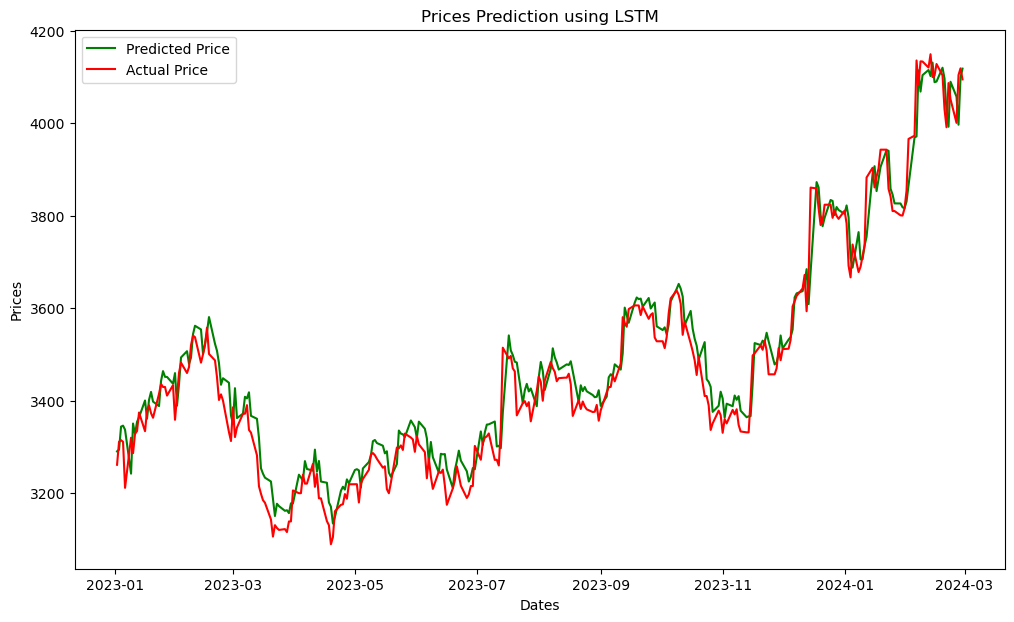

In [113]:
predictions_array = np.array(predictions)

Test_2023 = y_test['2023':'2024']
Predictions_2023 = predictions_array[-len(Test_2023):]
plt.figure(figsize=(12,7))
plt.plot(Test_2023.index, Predictions_2023, color='green', label='Predicted Price')
plt.plot(Test_2023.index, Test_2023, color='red', label='Actual Price')
plt.title('Prices Prediction using LSTM')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

### Comparing the Results 

In [114]:
data = {"MODEL":pd.Series(["Arima","SES","Holt's Method(Double Exponential Smoothing)"," Holt-Winters(Triple Exponential Smoothing)","LSTM"]),"RMSE_Values":pd.Series([error_arima2,error_ses2,error_h2,error_hw2,rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,LSTM,53.143159
0,Arima,57.172623
1,SES,75.746212
3,Holt-Winters(Triple Exponential Smoothing),95.213290
2,Holt's Method(Double Exponential Smoothing),97.664356


#### Forecast for 30 Days    

In [122]:
# Forecast for the Next 30 Days
forecast_input = scaled_data[-50:].reshape(1, 50, 1)  # Use the last 50 data points as input

predictions_next_30_days = []

for _ in range(30):
    # Predict the Next Data Point
    next_prediction = model.predict(forecast_input)
    predictions_next_30_days.append(next_prediction[0][0])
    
    forecast_input = np.append(forecast_input[:,1:,:], next_prediction.reshape(1,1,1), axis=1)

print(predictions_next_30_days)

1/1 [==============================] - 0s 34ms/step
[0.98385495, 0.981179, 0.98004454, 0.9793073, 0.978681, 0.97808695, 0.9775188, 0.97698224, 0.9764774, 0.9759997, 0.97554564, 0.97511286, 0.9747003, 0.9743069, 0.97393143, 0.9735731, 0.9732309, 0.97290426, 0.9725925, 0.97229475, 0.97201043, 0.9717389, 0.9714798, 0.9712324, 0.9709962, 0.9707707, 0.97055537, 0.9703496, 0.9701531, 0.9699656]


In [124]:
forecast = scaler.inverse_transform(np.array(predictions_next_30_days).reshape(-1, 1))
print(forecast)

[[4083.1257]
 [4072.1248]
 [4067.461 ]
 [4064.43  ]
 [4061.8552]
 [4059.4128]
 [4057.0771]
 [4054.8713]
 [4052.796 ]
 [4050.832 ]
 [4048.9653]
 [4047.186 ]
 [4045.49  ]
 [4043.8726]
 [4042.329 ]
 [4040.856 ]
 [4039.4492]
 [4038.1064]
 [4036.8245]
 [4035.6006]
 [4034.4316]
 [4033.3152]
 [4032.25  ]
 [4031.2332]
 [4030.262 ]
 [4029.335 ]
 [4028.4497]
 [4027.6038]
 [4026.796 ]
 [4026.0251]]


In [126]:
import datetime

last_date = df1.index[-1]
forecast_dates = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

forecast_df = pd.DataFrame(predictions_next_30_days, index=forecast_dates, columns=['Forecast'])
print(forecast_df)

            Forecast
2024-03-01  0.983855
2024-03-02  0.981179
2024-03-03  0.980045
2024-03-04  0.979307
2024-03-05  0.978681
2024-03-06  0.978087
2024-03-07  0.977519
2024-03-08  0.976982
2024-03-09  0.976477
2024-03-10  0.976000
2024-03-11  0.975546
2024-03-12  0.975113
2024-03-13  0.974700
2024-03-14  0.974307
2024-03-15  0.973931
2024-03-16  0.973573
2024-03-17  0.973231
2024-03-18  0.972904
2024-03-19  0.972592
2024-03-20  0.972295
2024-03-21  0.972010
2024-03-22  0.971739
2024-03-23  0.971480
2024-03-24  0.971232
2024-03-25  0.970996
2024-03-26  0.970771
2024-03-27  0.970555
2024-03-28  0.970350
2024-03-29  0.970153
2024-03-30  0.969966


In [127]:
forecast_df['Forecast'] = scaler.inverse_transform(forecast_df[['Forecast']])
forecast_df

,Forecast
2024-03-01,4083.125732
2024-03-02,4072.124756
2024-03-03,4067.460938
2024-03-04,4064.429932
2024-03-05,4061.855225
2024-03-06,4059.412842
2024-03-07,4057.077148
2024-03-08,4054.871338
2024-03-09,4052.795898
2024-03-10,4050.832031


### Save the Model

In [128]:
import pickle
with open('Lstm_Model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [129]:
# Load the Model From the File
with open('Lstm_Model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)